In [1]:
%matplotlib inline
# Dependencies and Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Raw data file
file_2014 = os.path.join('austin_crime.csv')
file_2015 = os.path.join('Annual_Crime_Dataset_2015.csv')
file_2016 = os.path.join('2016_Annual_Crime_Data.csv')

# Read crime report files and store into pandas data frame
crime_data_2014 = pd.read_csv(file_2014)
crime_data_2015 = pd.read_csv(file_2015)
crime_data_2016 = pd.read_csv(file_2016)

In [2]:
# Check original length of csv file rows
print(len(crime_data_2014))
print("-------------")
print(len(crime_data_2015))
print("-------------")
print(len(crime_data_2016))

159464
-------------
38573
-------------
37461


In [3]:
# Turn 2014 crime csv into dataframe and drop unneccessary columns
crime_data_2014 = pd.DataFrame(crime_data_2014)
crime_data_2014 = crime_data_2014.drop("latitude",axis=1)
crime_data_2014 = crime_data_2014.drop("location",axis=1)
crime_data_2014 = crime_data_2014.drop("longitude",axis=1)
crime_data_2014 = crime_data_2014.drop("census_tract",axis=1)
crime_data_2014 = crime_data_2014.drop("unique_key",axis=1)
crime_data_2014 = crime_data_2014.drop("zipcode",axis=1)
crime_data_2014 = crime_data_2014.drop("clearance_date",axis=1)
crime_data_2014 = crime_data_2014.drop("council_district_code",axis=1)
crime_data_2014 = crime_data_2014.drop("description",axis=1)
crime_data_2014 = crime_data_2014.drop("location_description",axis=1)
crime_data_2014 = crime_data_2014.drop("address",axis=1)

# Drop all rows containing no values
crime_data_2014 = crime_data_2014.dropna()

# Extract only 2014 data
crime_data_2014 = crime_data_2014.drop(crime_data_2014[crime_data_2014.year == 2015.0].index)

# Reorder columns
crime_data_2014 = crime_data_2014[['primary_type', 'timestamp', 'clearance_status', 'district', 'x_coordinate', 'y_coordinate', 'year']]
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft: Shoplifting,2014-04-04 00:00:00,Cleared by Arrest,B,3121345.0,10082705.0,2014.0
9,Auto Theft,2014-04-04 00:00:00,Not cleared,C,3118304.0,10072414.0,2014.0
14,Theft: All Other Larceny,2014-05-08 00:00:00,Not cleared,H,3125886.0,10047276.0,2014.0
17,Auto Theft,2014-12-18 00:00:00,Not cleared,C,3125976.0,10072207.0,2014.0
20,Theft: All Other Larceny,2014-04-16 00:00:00,Not cleared,B,3117183.0,10103211.0,2014.0


In [4]:
# Edit timestamp column to show only month
crime_data_2014['timestamp'] = crime_data_2014['timestamp'].map(lambda x: str(x)[5:7])
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft: Shoplifting,04,Cleared by Arrest,B,3121345.0,10082705.0,2014.0
9,Auto Theft,04,Not cleared,C,3118304.0,10072414.0,2014.0
14,Theft: All Other Larceny,05,Not cleared,H,3125886.0,10047276.0,2014.0
17,Auto Theft,12,Not cleared,C,3125976.0,10072207.0,2014.0
20,Theft: All Other Larceny,04,Not cleared,B,3117183.0,10103211.0,2014.0


In [5]:
# Edit clearance status to display only first character
crime_data_2014['clearance_status'] = crime_data_2014['clearance_status'].map(lambda x: str(x)[0:1])
crime_data_2014.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
4,Theft: Shoplifting,04,C,B,3121345.0,10082705.0,2014.0
9,Auto Theft,04,N,C,3118304.0,10072414.0,2014.0
14,Theft: All Other Larceny,05,N,H,3125886.0,10047276.0,2014.0
17,Auto Theft,12,N,C,3125976.0,10072207.0,2014.0
20,Theft: All Other Larceny,04,N,B,3117183.0,10103211.0,2014.0


In [6]:
# Check length of set
len(crime_data_2014)

32996

In [7]:
# Turn 2015 and 2016 crime csv into dataframes and drop unneccessary columns
crime_data_2015 = pd.DataFrame(crime_data_2015)
crime_data_2016 = pd.DataFrame(crime_data_2016)

crime_data_2015 = crime_data_2015.drop("GO Primary Key",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Primary Key",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Highest Offense Desc",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Highest Offense Desc",axis=1)

crime_data_2015 = crime_data_2015.drop("Clearance Date",axis=1)
crime_data_2016 = crime_data_2016.drop("Clearance Date",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Location Zip",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Location Zip",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Location",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Location",axis=1)

crime_data_2015 = crime_data_2015.drop("GO Census Tract",axis=1)
crime_data_2016 = crime_data_2016.drop("GO Census Tract",axis=1)

crime_data_2015 = crime_data_2015.drop("Council District",axis=1)
crime_data_2016 = crime_data_2016.drop("Council District",axis=1)

# Drop all rows containing no values
crime_data_2015 = crime_data_2015.dropna()
crime_data_2016 = crime_data_2016.dropna()

In [8]:
# Rename columns for merge
crime_data_2015.columns = ['primary_type', 'timestamp', 'clearance_status', 'district', 'x_coordinate', 'y_coordinate']

# Add year column
crime_data_2015['year'] = 2015.0

# Edit timestamp column to show only month
crime_data_2015['timestamp'] = crime_data_2015['timestamp'].map(lambda x: str(x)[2:5])
crime_data_2015.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
0,Robbery,Jan,N,E,3130483.0,10102366.0,2015.0
1,Robbery,Jan,N,I,3124730.0,10090296.0,2015.0
2,Burglary,Jan,N,E,3135985.0,10117220.0,2015.0
3,Burglary,Jan,N,I,3129896.0,10096032.0,2015.0
4,Burglary,Jan,N,F,3110455.0,10039340.0,2015.0


In [9]:
# Rename columns for merge
crime_data_2016.columns = ['primary_type', 'timestamp', 'clearance_status', 'district', 'x_coordinate', 'y_coordinate']

# Add year column
crime_data_2016["year"] = 2016.0

# Edit timestamp column to show only month
crime_data_2016['timestamp'] = crime_data_2016['timestamp'].map(lambda x: str(x)[2:5])
crime_data_2016.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
0,Agg Assault,Jan,C,D,3067322.0,10062796.0,2016.0
1,Theft,Jan,C,G,3114957.0,10070462.0,2016.0
2,Robbery,Jan,N,E,3129181.0,10106923.0,2016.0
3,Theft,Jan,N,G,3113643.0,10070357.0,2016.0
5,Agg Assault,Jan,N,C,3146947.0,10077985.0,2016.0


In [10]:
# Check length of set
len(crime_data_2015)

36125

In [11]:
# Check length of set
len(crime_data_2016)

34973

In [12]:
# Merge all data sets into one
crime_data_merge = pd.merge(crime_data_2014,crime_data_2015, how ="outer")

In [13]:
#crime_data_merge_final = pd.merge(crime_data_merge,crime_data_2016, how ="outer",on = "primary_type")
#crime_data_merge_final.head()


In [14]:
crime_data_merge_final = pd.merge(crime_data_merge,crime_data_2016, how ="outer")
crime_data_merge_final.head()

,primary_type,timestamp,clearance_status,district,x_coordinate,y_coordinate,year
0,Theft: Shoplifting,04,C,B,3121345.0,10082705.0,2014.0
1,Theft: Shoplifting,04,C,B,3121345.0,10082705.0,2014.0
2,Theft: Shoplifting,04,C,B,3121345.0,10082705.0,2014.0
3,Theft: Shoplifting,04,C,B,3121345.0,10082705.0,2014.0
4,Theft: Shoplifting,04,C,B,3121345.0,10082705.0,2014.0


In [15]:
# Print value counts for review
print(crime_data_merge_final["primary_type"].value_counts())
print("-------------------------------\n")
print(crime_data_merge_final["timestamp"].value_counts())
print("-------------------------------\n")
print(crime_data_merge_final["clearance_status"].value_counts())
print("-------------------------------\n")
print(crime_data_merge_final["district"].value_counts())
print("-------------------------------\n")
print(crime_data_merge_final["year"].value_counts())

Theft                                           51535
Theft: All Other Larceny                        12930
Theft: BOV                                      10290
Burglary                                         9885
Auto Theft                                       6134
Agg Assault                                      3921
Theft: Shoplifting                               3894
Robbery                                          2576
Aggravated Assault                               1827
Theft: Pocket Picking                             427
Theft: Auto Parts                                 228
Theft: from Building                              217
Theft: Coin Op Machine                            150
Murder                                             48
Homicide: Murder & Nonnegligent Manslaughter       25
Theft: Purse Snatching                              7
Name: primary_type, dtype: int64
-------------------------------

-Ju    8606
-Ma    8605
-Ap    4304
-Ja    4289
-Au    4238
-De    420

In [16]:
crime_data_2014["primary_type"].value_counts()

Theft: All Other Larceny                        12930
Theft: BOV                                      10290
Theft: Shoplifting                               3894
Auto Theft                                       2162
Aggravated Assault                               1827
Robbery                                           839
Theft: Pocket Picking                             427
Theft: Auto Parts                                 228
Theft: from Building                              217
Theft: Coin Op Machine                            150
Homicide: Murder & Nonnegligent Manslaughter       25
Theft: Purse Snatching                              7
Name: primary_type, dtype: int64

In [17]:
primary_type = ["Theft", "Auto Theft", "Aggravated Assault", "Robbery", "Homicide"]
counts = [27915,2390,1827,839,25]
colors = ["red","green","blue","orange","yellow"]
explode = (0.1,0.1,0.1,0.1,0.3)

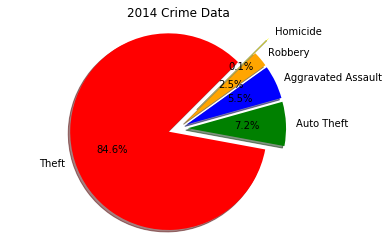

In [18]:
plt.pie(counts, explode=explode, labels=primary_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('2014 Crime Data')
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

In [19]:
crime_data_2015["primary_type"].value_counts()

Theft          26624
Burglary        4846
Auto Theft      1982
Agg Assault     1829
Robbery          826
Murder            18
Name: primary_type, dtype: int64

In [20]:
primary_type = ["Theft", "Burglary", "Auto Theft", "Agg Assault", "Robbery","Murder"]
counts = [26624,4846,1982,1829,826,18]
colors = ["red","green","blue","orange","yellow","purple"]
explode = (0.1,0,0,0,0,0.3)

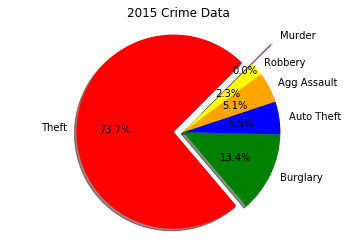

In [21]:
plt.pie(counts, explode=explode, labels=primary_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('2015 Crime Data')
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

In [22]:
crime_data_2016["primary_type"].value_counts()

Theft          24911
Burglary        5039
Agg Assault     2092
Auto Theft      1990
Robbery          911
Murder            30
Name: primary_type, dtype: int64

In [23]:
primary_type = ["Theft", "Burglary", "Auto Theft", "Agg Assault", "Robbery","Murder"]
counts = [24911,5039,2092,1990,911,30]
colors = ["red","green","blue","orange","yellow","purple"]
explode = (0.1,0,0,0,0,0.3)

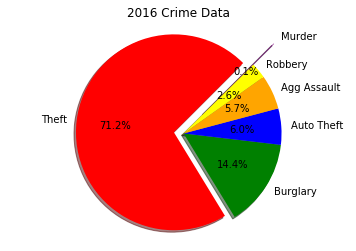

In [24]:
plt.pie(counts, explode=explode, labels=primary_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('2016 Crime Data')
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

In [25]:
#final merged data
crime_data_merge_final["primary_type"].value_counts()

Theft                                           51535
Theft: All Other Larceny                        12930
Theft: BOV                                      10290
Burglary                                         9885
Auto Theft                                       6134
Agg Assault                                      3921
Theft: Shoplifting                               3894
Robbery                                          2576
Aggravated Assault                               1827
Theft: Pocket Picking                             427
Theft: Auto Parts                                 228
Theft: from Building                              217
Theft: Coin Op Machine                            150
Murder                                             48
Homicide: Murder & Nonnegligent Manslaughter       25
Theft: Purse Snatching                              7
Name: primary_type, dtype: int64

In [26]:
primary_type = ["Theft", "Burglary", "Auto Theft", "Agg Assault", "Robbery","Murder"]
counts = [79450,9885,6362,3921,2576,48]
colors = ["red","green","blue","orange","yellow","purple"]
explode = (0.1,0,0,0,0,0.3)

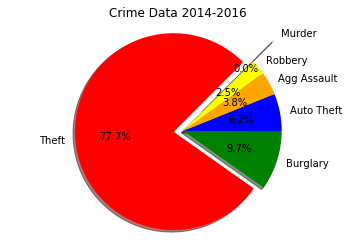

In [27]:
plt.pie(counts, explode=explode, labels=primary_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('Crime Data 2014-2016')
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

In [28]:
crime_data_2015["district"].value_counts()

D     5226
E     4719
B     4691
F     4422
I     4118
A     3950
H     3508
C     2747
G     2577
AP     166
UK       1
Name: district, dtype: int64

In [29]:
#2015 crime rate by district 
x1 = district_D = crime_data_2015.loc[crime_data_2015["district"] =="D"]
x2 = district_E = crime_data_2015.loc[crime_data_2015["district"] =="E"]
x3 = district_F = crime_data_2015.loc[crime_data_2015["district"] =="F"]
x4 = district_A = crime_data_2015.loc[crime_data_2015["district"] =="A"]
x5 = district_I = crime_data_2015.loc[crime_data_2015["district"] =="I"]
x6 = district_B = crime_data_2015.loc[crime_data_2015["district"] =="B"]
x7 = district_H = crime_data_2015.loc[crime_data_2015["district"] =="H"]
x8 = district_G = crime_data_2015.loc[crime_data_2015["district"] =="G"]
x9 = district_C = crime_data_2015.loc[crime_data_2015["district"] =="C"]
x10 = district_AP = crime_data_2015.loc[crime_data_2015["district"] =="AP"]

In [30]:
#2015 crime rate by district "D"
x1 = district_D = crime_data_2015.loc[crime_data_2015["district"] =="D"]
primary_value_counts = x1["primary_type"].value_counts()

Text(0,0.5,'Crime count')

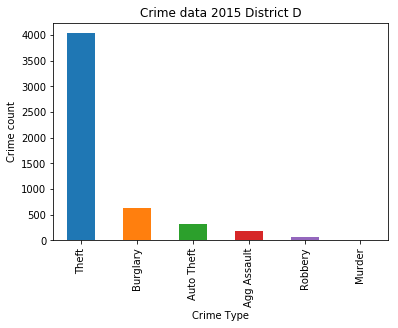

In [31]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District D")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [32]:
#2015 crime rate by district "E"
x2 = district_E = crime_data_2015.loc[crime_data_2015["district"] =="E"]
primary_value_counts = x2["primary_type"].value_counts()

Text(0,0.5,'Crime count')

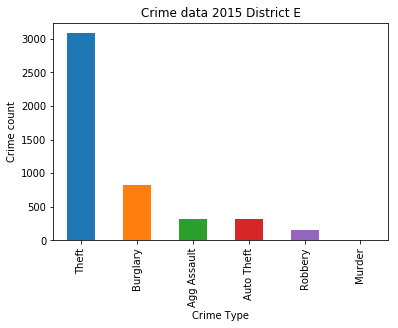

In [33]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District E")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [34]:
#2015 crime rate by district "F"
x3 = district_F = crime_data_2015.loc[crime_data_2015["district"] =="F"]
primary_value_counts = x3["primary_type"].value_counts()

Text(0,0.5,'Crime count')

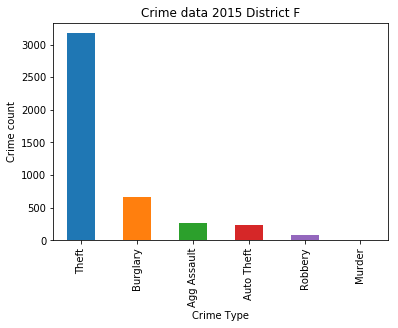

In [35]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District F")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [36]:
#2015 crime rate by district "A"
x4 = district_A = crime_data_2015.loc[crime_data_2015["district"] =="A"]
primary_value_counts = x4["primary_type"].value_counts()

Text(0,0.5,'Crime count')

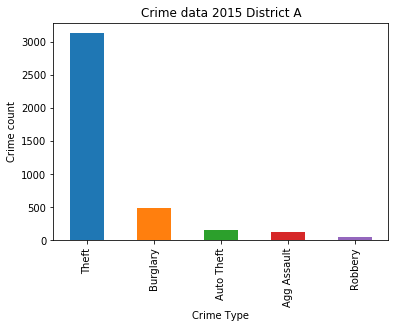

In [37]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District A")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [38]:
#2014 crime rate by district "I"
x5 = district_I = crime_data_2015.loc[crime_data_2015["district"] =="I"]
primary_value_counts = x5["primary_type"].value_counts()

Text(0,0.5,'Crime count')

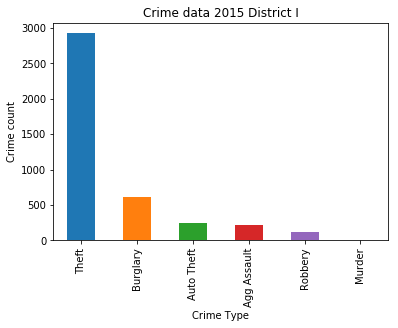

In [39]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District I")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [40]:
x6 = district_B = crime_data_2015.loc[crime_data_2015["district"] =="B"]
primary_value_counts = x6["primary_type"].value_counts()

Text(0,0.5,'Crime count')

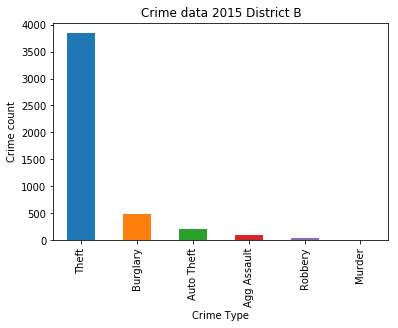

In [41]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District B")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [42]:
x7 = district_H= crime_data_2015.loc[crime_data_2015["district"] =="H"]
primary_value_counts = x7["primary_type"].value_counts()

Text(0,0.5,'Crime count')

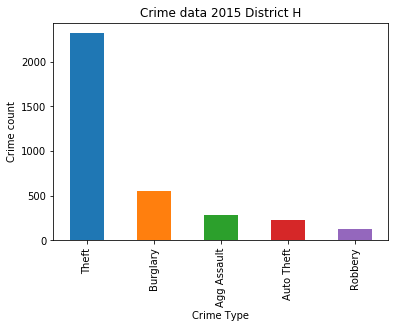

In [43]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District H")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [44]:
x8 = district_G = crime_data_2015.loc[crime_data_2015["district"] =="G"]
primary_value_counts = x8["primary_type"].value_counts()

Text(0,0.5,'Crime count')

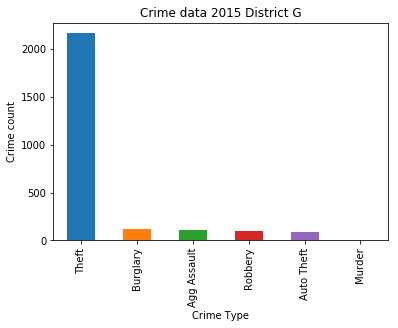

In [45]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District G")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [46]:
x9 = district_C = crime_data_2015.loc[crime_data_2015["district"] =="C"]
primary_value_counts = x9["primary_type"].value_counts()

Text(0,0.5,'Crime count')

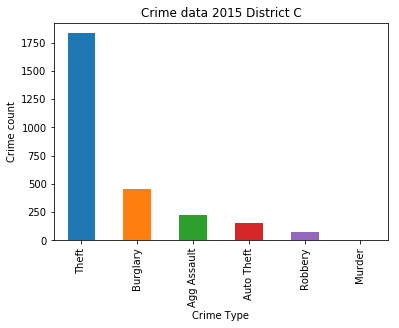

In [47]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District C")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [48]:
x10 = district_AP = crime_data_2015.loc[crime_data_2015["district"] =="AP"]
primary_value_counts = x10["primary_type"].value_counts()

Text(0,0.5,'Crime count')

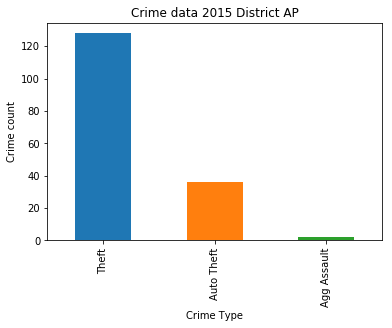

In [49]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2015 District AP")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [50]:
crime_data_2016["district"].value_counts()

D     5083
E     4409
F     4172
B     4159
I     4065
H     3957
A     3793
C     2653
G     2518
AP     154
88       9
UK       1
Name: district, dtype: int64

In [51]:
x1 = district_D = crime_data_2016.loc[crime_data_2016["district"] =="D"]
x2 = district_E = crime_data_2016.loc[crime_data_2016["district"] =="E"]
x3 = district_F = crime_data_2016.loc[crime_data_2016["district"] =="F"]
x4 = district_A = crime_data_2016.loc[crime_data_2016["district"] =="A"]
x5 = district_I = crime_data_2016.loc[crime_data_2016["district"] =="I"]
x6 = district_B = crime_data_2016.loc[crime_data_2016["district"] =="B"]
x7 = district_H = crime_data_2016.loc[crime_data_2016["district"] =="H"]
x8 = district_G = crime_data_2016.loc[crime_data_2016["district"] =="G"]
x9 = district_C = crime_data_2016.loc[crime_data_2016["district"] =="C"]
x10 = district_AP = crime_data_2016.loc[crime_data_2016["district"] =="AP"]

In [52]:
#2016 crime rate by district "D"
x1 = district_D = crime_data_2016.loc[crime_data_2016["district"] =="D"]
primary_value_counts = x1["primary_type"].value_counts()

Text(0,0.5,'Crime count')

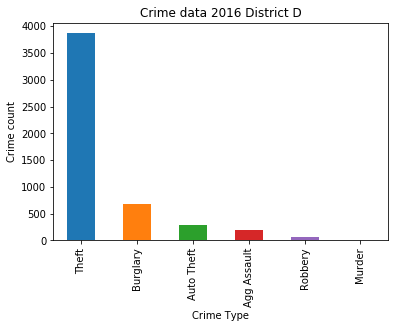

In [53]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District D")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [54]:
#2016 crime rate by district "E"
x2 = district_E = crime_data_2016.loc[crime_data_2016["district"] =="E"]
primary_value_counts = x2["primary_type"].value_counts()

Text(0,0.5,'Crime count')

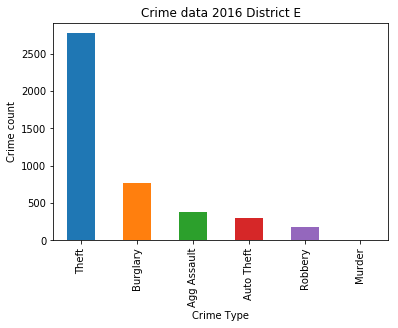

In [55]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District E")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [56]:
#2016 crime rate by district "F"
x3 = district_F = crime_data_2016.loc[crime_data_2016["district"] =="F"]
primary_value_counts = x3["primary_type"].value_counts()

Text(0,0.5,'Crime count')

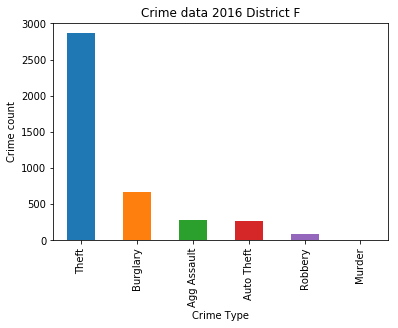

In [57]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District F")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [58]:
#2016 crime rate by district "A"
x4 = district_A = crime_data_2016.loc[crime_data_2016["district"] =="A"]
primary_value_counts = x4["primary_type"].value_counts()

Text(0,0.5,'Crime count')

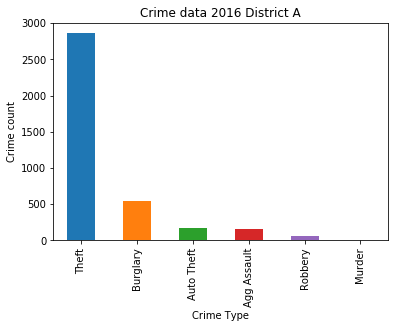

In [59]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District A")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [60]:
#2016 crime rate by district "I"
x5 = district_I = crime_data_2016.loc[crime_data_2016["district"] =="I"]
primary_value_counts = x5["primary_type"].value_counts()

Text(0,0.5,'Crime count')

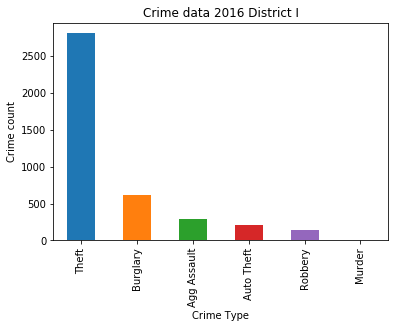

In [61]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District I")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [62]:
#2016 crime rate by district "B"
x6 = district_B = crime_data_2016.loc[crime_data_2016["district"] =="B"]
primary_value_counts = x6["primary_type"].value_counts()

Text(0,0.5,'Crime count')

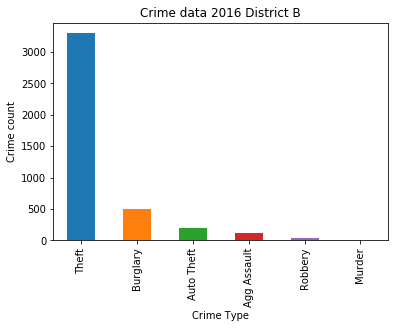

In [63]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District B")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [64]:
#2016 crime rate by district "H"
x7 = district_H = crime_data_2016.loc[crime_data_2016["district"] =="H"]
primary_value_counts = x7["primary_type"].value_counts()

Text(0,0.5,'Crime count')

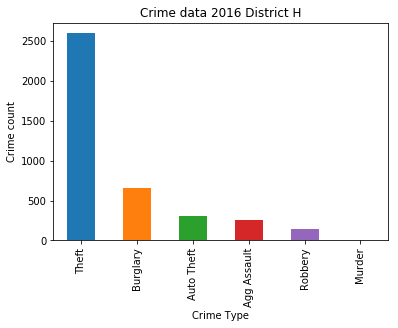

In [65]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District H")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [66]:
#2016 crime rate by district "G"
x8 = district_G = crime_data_2016.loc[crime_data_2016["district"] =="G"]
primary_value_counts = x8["primary_type"].value_counts()

Text(0,0.5,'Crime count')

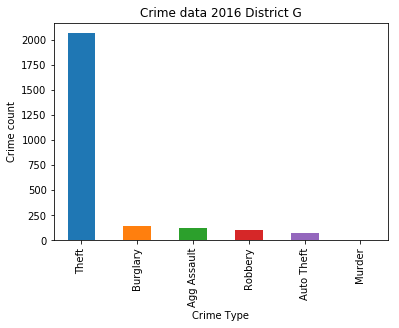

In [67]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District G")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [68]:
#2016 crime rate by district "G"
x8 = district_G = crime_data_2016.loc[crime_data_2016["district"] =="G"]
primary_value_counts = x8["primary_type"].value_counts()

Text(0,0.5,'Crime count')

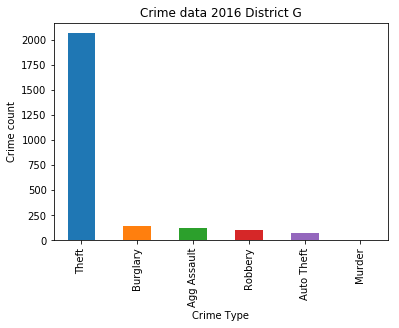

In [69]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District G")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [70]:
#2016 crime rate by district "C"
x9 = district_C = crime_data_2016.loc[crime_data_2016["district"] =="C"]
primary_value_counts = x9["primary_type"].value_counts()

Text(0,0.5,'Crime count')

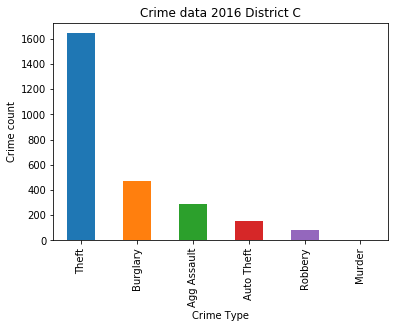

In [71]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District C")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [72]:
#2016 crime rate by district "AP"
x10 = district_AP = crime_data_2016.loc[crime_data_2016["district"] =="AP"]
primary_value_counts = x10["primary_type"].value_counts()

Text(0,0.5,'Crime count')

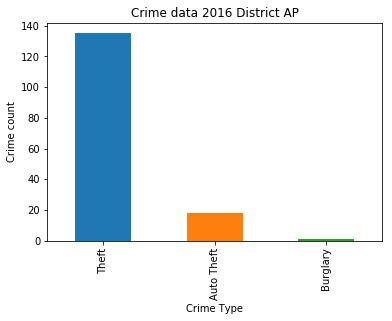

In [73]:
primary_value_counts.plot(kind="bar")
plt.title("Crime data 2016 District AP")
plt.xlabel("Crime Type")
plt.ylabel("Crime count")

In [134]:
year_2014 = crime_data_2014["primary_type"].value_counts()
year_2015 = crime_data_2015["primary_type"].value_counts()
year_2016 = crime_data_2016["primary_type"].value_counts()

year_2014 = list(year_2014.values)
year_2015 = list(year_2015.values)
year_2016 = list(year_2016.values)


In [135]:
year_2014

[12930, 10290, 3894, 2162, 1827, 839, 427, 228, 217, 150, 25, 7]

In [137]:
x = [crime_data_201["primary_type"].value_counts(),
     crime_data_201["district"].value_counts()]
y = ["Theft", "Burglary", "Auto Theft", "Agg Assault", "Robbery","Murder"]
z=[1,2,3,3,3]
k=[11,12,13]



ax = plt.subplot(111)
ax.bar(np.arange(12)-15, year_2014,color='b',align='center')
ax.bar(np.arange(6), year_2015,color='g',align='center')
ax.bar(np.arange(6)+7, year_2016,color='r',align='center')
plt.show()

NameError: name 'crime_data_201' is not defined

In [87]:
print (primary_value_counts)

Theft         135
Auto Theft     18
Burglary        1
Name: primary_type, dtype: int64


<BarContainer object of 3 artists>

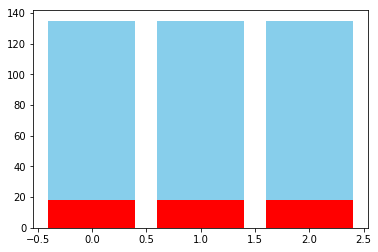

In [91]:
ind = np.arange(len(primary_value_counts))

fig, ax = plt.subplots()

ax.bar(ind,primary_value_counts['Theft'], color = "SkyBlue")
ax.bar(ind,primary_value_counts['Burglary'], color = "Red")
ax.bar(ind,primary_value_counts['Auto Theft'], color = "Red")
